In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import numpy as np

import os
import sys
os.path.dirname(sys.executable)
sys.path.append('/kuacc/users/baristopal20/SSuperGAN/')

In [3]:
from networks.ssupergan import SSuperGAN

In [4]:
seq_args = {
    "lstm_hidden": 256,    # hidden size of LSTM module
    "embed": 256,          # last size for mean and std outputs
    "cnn_embed": 2048,     # the output dim retrieved from CNN embedding module
    "fc_hiddens": [],      # sizes of FC layers after LSTM output, if there are any
    "lstm_dropout": 0,     # set to 0 if num_lstm_layers is 1, otherwise set to [0, 0.5]
    "fc_dropout": 0,       # dropout ratio of FC layers if there are any
    "num_lstm_layers": 1   # number of stacked LSTM layers
}

In [5]:
model = SSuperGAN(seq_args).cuda()

In [6]:
x = torch.randn(16, 3, 3, 360, 360).cuda() # Sample sequential images
y = torch.randn(16, 3, 64, 64).cuda() # Sample target images to generate

In [7]:
with torch.no_grad():
    kl, recon, discr = model(x, y)

In [8]:
kl, recon, discr

(tensor(4.2550, device='cuda:0'),
 tensor(-18166.3984, device='cuda:0'),
 tensor(0.7126, device='cuda:0'))

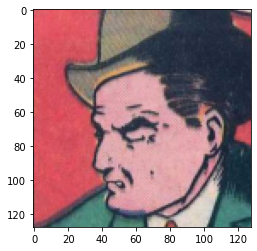

In [11]:
from torch.utils.data import DataLoader
from data.datasets.golden_faces import GoldenFacesDataset
from data.augment import get_PIL_image
import matplotlib.pyplot as plt

face_img_path = "../../golden_faces/"
data = GoldenFacesDataset(face_img_path, face_dim=128, augment=False)
dl = DataLoader(data, batch_size=16)

for x in dl:
    img = get_PIL_image(x[4,:,:,:])
    plt.imshow(img)
    break